##  Face Reocognition using Deep Learning CNN 
This project train Deep Learning CNN model and testing it with webcam. Also using OpenCV package for detecting and capturing faces of images

In [22]:
# Import required libraries
import cv2
import os
import numpy as np
import cv2
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from os import listdir

### Take photos of user for training

Face Detecting amd Face capturing using OpenCV package. Photos must placed into a folder under /dataset directory. The code below capture 50 images from webcam

In [52]:
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each person, enter name
face_id = input('\n enter name end press <return> ==>  ')

print("\n [INFO] Initializing face capture. Look the camera and move the head left right up down for 10 seconds ...")
# Initialize individual sampling face count
count = 0

while(True):

    ret, img = cam.read()
    #img = cv2.flip(img, -1) # flip video image vertically
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1

        # Save the captured image into the datasets folder
        cv2.imwrite("datasettrain/User_" + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

        cv2.imshow('image', img)

    k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 50: # Take 50 face sample and stop video
         break

# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()


 enter name end press <return> ==>  test

 [INFO] Initializing face capture. Look the camera and move the head left right up down for 10 seconds ...

 [INFO] Exiting Program and cleanup stuff


In [2]:
# folder where images are present
TrainingImagePath='./datasettrain'
TrainingImagePathTest='./datasettest'

from keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 64, 64
batch_size=32

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
# only rescale on the testing images
test_datagen = ImageDataGenerator(rescale=1./255)

'''# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')'''

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(img_rows, img_rows),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePathTest,
        target_size=(img_rows, img_rows),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# Printing class labels for each face from dataset
test_set.class_indices

Found 960 images belonging to 37 classes.
Found 120 images belonging to 37 classes.


{'christos': 0,
 'dora': 1,
 'face1': 2,
 'face10': 3,
 'face11': 4,
 'face12': 5,
 'face13': 6,
 'face14': 7,
 'face15': 8,
 'face16': 9,
 'face2': 10,
 'face3': 11,
 'face4': 12,
 'face5': 13,
 'face6': 14,
 'face7': 15,
 'face8': 16,
 'face9': 17,
 'gio': 18,
 'giota': 19,
 'kostas': 20,
 'maraki': 21,
 'nikos': 22,
 'nionios': 23,
 'panos': 24,
 'paras': 25,
 'pegk': 26,
 'penaki': 27,
 'peris': 28,
 'psilos': 29,
 'romanos': 30,
 'stathis': 31,
 'stavtos': 32,
 'vill': 33,
 'xara': 34,
 'xaris': 35,
 'zisis': 36}

In [3]:
# Creating lookup table for all faces 
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName


# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'christos', 1: 'dora', 2: 'face1', 3: 'face10', 4: 'face11', 5: 'face12', 6: 'face13', 7: 'face14', 8: 'face15', 9: 'face16', 10: 'face2', 11: 'face3', 12: 'face4', 13: 'face5', 14: 'face6', 15: 'face7', 16: 'face8', 17: 'face9', 18: 'gio', 19: 'giota', 20: 'kostas', 21: 'maraki', 22: 'nikos', 23: 'nionios', 24: 'panos', 25: 'paras', 26: 'pegk', 27: 'penaki', 28: 'peris', 29: 'psilos', 30: 'romanos', 31: 'stathis', 32: 'stavtos', 33: 'vill', 34: 'xara', 35: 'xaris', 36: 'zisis'}
The Number of output neurons:  37


### Create CNN deep learning model

CNN model with:
- 2 hidden layers of convolution
- 2 hidden layers of max pooling
- 1 layer of flattening
- 1 Hidden ANN layer
- 1 output layer with 37-neurons (one for each face)

Some of the important hyperparameters:
- Filters=32: This number indicates how many filters we are using to look at the image pixels during the convolution step. Some filters may catch sharp edges, some filters may catch color variations some filters may catch outlines, etc. In the end, we get important information from the images. In the first layer the number of filters=32 is commonly used, then increasing the power of 2. Like in the next layer it is 64, in the next layer, it is 128 so on and so forth.
- kernel_size=(5,5): This indicates the size of the sliding window during convolution, in this case study we are using 5X5 pixels sliding window.
- strides=(1, 1): How fast or slow should the sliding window move during convolution. We are using the lowest setting of 1X1 pixels. Means slide the convolution window of 5X5 (kernal_size) by 1 pixel in the x-axis and 1 pixel in the y-axis until the whole image is scanned.
- input_shape=(64,64,3): Images are nothing but matrix of RGB color codes. during our data pre-processing we have compressed the images to 64X64, hence the expected shape is 64X64X3. Means 3 arrays of 64X64, one for RGB colors each
- kernel_initializer=’uniform’: When the Neurons start their computation, some algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for it like ‘normal’ or ‘glorot_uniform’.
- activation=’relu’: This specifies the activation function for the calculations inside each neuron. You can choose values like ‘relu’, ‘tanh’, ‘sigmoid’, etc.
- optimizer=’adam’: This parameter helps to find the optimum values of each weight in the neural network. ‘adam’ is one of the most useful optimizers, another one is ‘rmsprop’
- batch_size=32: This specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin and the neural network will start adjusting its weights based on the errors. When all the rows are passed in the batches of 10 rows each as specified in this parameter, then we call that 1-epoch. Or one full data cycle.
- Epochs=10: The same activity of adjusting weights continues for 10 times, as specified by this parameter. 

In [4]:
# Create CNN deep learning model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model

# Initializing the Convolutional Neural Network
classifier= Sequential()

# STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels

classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

# STEP--2 MAX Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

# ADDITIONAL LAYER of CONVOLUTION for better accuracy 
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

# STEP--3 FLattening
classifier.add(Flatten())

# STEP--4 Fully Connected Neural Network
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                692288    
_________________________________________________________________
dense_1 (Dense)              (None, 37)                2

In [5]:
%%time
# train model
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Compiling the CNN
# classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])


batch_size=32
nb_train_samples = 960        
nb_validation_samples = 120         

# Starting the model training
history = classifier.fit_generator(
                    training_set,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=nb_validation_samples // batch_size)


#fname='clasifier_weights.h5'
#classifier.load_weights(fname)
#classifier.save_weights("clasifier_weights2.h5")
#load_status = classifier.load_weights("clasifier_weights2.h5")
#model = Model(inputs=classifier.layers[0].input, outputs=classifier.layers[-3].output)

c:\users\skratimenos\miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 12s 367ms/step - loss: 3.6388 - accuracy: 0.0456 - val_loss: 3.5805 - val_accuracy: 0.0938
Epoch 2/10
30/30 [==============================] - 8s 280ms/step - loss: 3.4280 - accuracy: 0.1047 - val_loss: 3.0511 - val_accuracy: 0.1771
Epoch 3/10
30/30 [==============================] - 9s 282ms/step - loss: 2.6861 - accuracy: 0.2946 - val_loss: 1.8491 - val_accuracy: 0.6042
Epoch 4/10
30/30 [==============================] - 9s 287ms/step - loss: 1.5671 - accuracy: 0.6321 - val_loss: 1.1881 - val_accuracy: 0.6771
Epoch 5/10
30/30 [==============================] - 9s 289ms/step - loss: 0.7757 - accuracy: 0.8376 - val_loss: 0.4394 - val_accuracy: 0.8958
Epoch 6/10
30/30 [==============================] - 8s 280ms/step - loss: 0.3993 - accuracy: 0.9101 - val_loss: 0.2478 - val_accuracy: 0.9167
Epoch 7/10
30/30 [==============================] - 9s 294ms/step - loss: 0.1921 - accuracy: 0.9696 - val_loss: 0.1077 - val_accuracy: 0.9896
Epoch

Text(0.5, 0, 'Epochs')

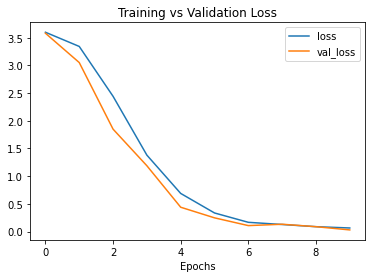

In [6]:
# plot training and validation loss
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot(title='Training vs Validation Loss')
plt.xlabel('Epochs')

### Test model using your webcam

Open webcam and capture the face on capture_face folder, after that compare the captured face with the capture face of live webcamp 

In [20]:
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each person, enter name
face_name = input('\n enter name end press <return> ==>  ')

# Initialize individual sampling face count
count = 0

while(True):

    ret, img = cam.read()
    #img = cv2.flip(img, -1) # flip video image vertically
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1

        # Save the captured image into the datasets folder
        cv2.imwrite("capture_face/" + str(face_name) + ".jpg", gray[y:y+h,x:x+w])
        
        
        cv2.imshow('image', img)

    k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 1: # Take 1 face sample and stop video
         break

# Do a bit of cleanup
cam.release()
cv2.destroyAllWindows()

# This code below looks up the face you saved in the "capture_face" folder and uses the similarity (Cosine Similarity)
# to compare the face that captured above with the one being extracted with your webcam.

# preprocess function for images
def preprocess_image(image_path):
    #Loads image from path and resizes it
    img = load_img(image_path, target_size=(64, 64))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

#points to your capture face
people_pictures = "./capture_face/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    all_people_faces[person_face] = classifier.predict(preprocess_image('./capture_face/%s.jpg' % (person_face)))[0,:]

print("Face representations retrieved successfully")

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

#Open Webcam
cap = cv2.VideoCapture(0) 

while(True):
    ret, img = cap.read()
    faces = face_detector.detectMultiScale(img, 1.3, 5)

    for (x,y,w,h) in faces:
        if w > 100: #Adjust accordingly if your webcam resoluation is higher
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
            detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
            detected_face = cv2.resize(detected_face, (64, 64)) #resize to 224x224

            img_pixels = image.img_to_array(detected_face)
            img_pixels = np.expand_dims(img_pixels, axis = 0)
            img_pixels /= 255

            captured_representation = classifier.predict(img_pixels)[0,:]

            found = 0
            for i in all_people_faces:
                person_name = i
                representation = all_people_faces[i]

                similarity = findCosineSimilarity(representation, captured_representation)
                if(similarity < 0.1):
                    cv2.putText(img, person_name[0:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    found = 1
                    break

            #connect face and text
            cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
            cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

            if(found == 0): #if found image is not in our people database
                cv2.putText(img, 'unknown', (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    cv2.imshow('img',img)

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

# delete all from capture_face
import os
import glob
files = glob.glob('./capture_face/*')
for f in files:
    os.remove(f)


 enter name end press <return> ==>  stathis
Face representations retrieved successfully


Function for loading the model

In [68]:
def loadFaceModel():
    classifier= Sequential()

    classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

    classifier.add(MaxPool2D(pool_size=(2,2)))

    classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

    classifier.add(MaxPool2D(pool_size=(2,2)))

    classifier.add(Flatten())

    classifier.add(Dense(64, activation='relu'))

    classifier.add(Dense(OutputNeurons, activation='softmax'))
    
    from keras.models import model_from_json    
    classifier.load_weights('clasifier_weights2.h5')
    face_descriptor = Model(inputs=classifier.layers[0].input, outputs=classifier.layers[-3].output)
    
    return face_descriptor

model = loadFaceModel()
print("Model Loaded")

Model Loaded


Function for verify if two faces are same 

In [15]:
epsilon = 0.30

def verifyFace(img1, img2):
    img1_representation = classifier.predict(preprocess_image('%s' % (img1)))[0,:]
    img2_representation = classifier.predict(preprocess_image('%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

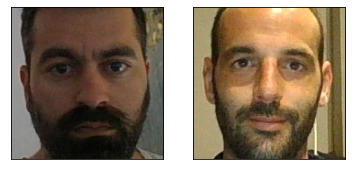

Cosine similarity:  1.0
They are not same person!


In [18]:
verifyFace("stathis.jpg", "panos.jpg")

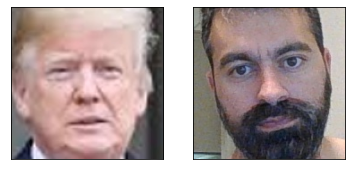

Cosine similarity:  1.0
They are not same person!


In [11]:
verifyFace("face_trump.jpg", "stathis2.jpg")

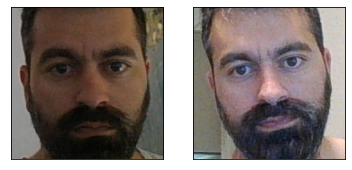

Cosine similarity:  0.0
They are same person


In [19]:
verifyFace("stathis.jpg", "stathis2.jpg")